In [1]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
CurrentConfig.ONLINE_HOST='https://assets.pyecharts.org/assets/'

In [36]:
#导入数据并且描述数据集
from pyecharts.charts import Line,Bar
import pandas as pd
import pyecharts.options as opts
df1=pd.read_csv('total.csv')
df1=df1.drop(axis=1,columns='Unnamed: 0')
print(df1.describe())

                  日期             时间            交易量            成功率  \
count  130440.000000  130440.000000  130440.000000  130440.000000   
mean      249.975682    1176.481999     606.609330      95.852036   
std        92.918352     692.064916     524.946077       2.802879   
min       111.000000       0.000000       1.000000       0.000000   
25%       202.000000     558.000000      66.000000      95.050000   
50%       225.000000    1157.000000     591.000000      95.830000   
75%       319.000000    1757.000000    1028.000000      96.720000   
max       411.000000    2359.000000    2881.000000     100.000000   

               响应时间             月份              日              时  \
count  1.304400e+05  130440.000000  130440.000000  130440.000000   
mean   1.388948e+03       2.344733      15.502361      11.469833   
std    1.281480e+05       0.960873       8.690858       6.918510   
min    2.367000e+01       1.000000       1.000000       0.000000   
25%    9.581000e+01       2.000000    

In [35]:

#分组求和,按照日期将每天的交易量进行求和
df2=df1.groupby('日期').sum()['交易量']
bar=Bar()
bar.add_xaxis(xaxis_data=df2.index.tolist())
bar.add_yaxis(y_axis=df2.values.tolist(),series_name='交易量')
bar.render_notebook()

In [37]:
a=[111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411]
#b为求和之后的数据
b=df2.values.tolist()
a=[str(i) for i in a]
print(a)
print(b)
line=(
    Line(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add_xaxis(xaxis_data=a)
    .add_yaxis(series_name='交易量',y_axis=b,color='red',is_connect_nones=True,
              markpoint_opts=opts.MarkPointOpts(
              data=[
                 opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"), 
              ]))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="每天总交易量", subtitle="atm"),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        toolbox_opts=opts.ToolboxOpts(is_show=True),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
)
line.render_notebook()

['111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411']
[971777, 933959, 963340, 889010, 893092, 1071059, 1054375, 936156, 1112017, 1178148, 1136592, 1164481, 1402668, 1606273, 1836442, 1876286, 1111483, 407873, 379773, 459496, 512347, 558835, 694338, 781467, 880100, 840618, 885278, 804417, 613042, 823197, 882861, 851509, 874354, 960540, 911828, 960474, 886036, 842104, 810638, 811104, 830807, 784066, 710113, 814089

### 第一问
由于我们的要求是要做一套交易状态异常检测方案，所以我们根据LOF来作为其特征参数，来判断其是否为异常点。 由前面的柱状图和折线图我们知道， 1.23号到1.27号， 1.28号到2.4号， 此两段日期与2.4号之后差异巨大，因此我们将时间分为三段处理， 第一段为1.23 到1.27， 第二段为1. 28 到2.4， 第三段为1.11到1.22，2.4到4.23。 处理后的折线图见下， 横轴是时刻， 纵轴是对应时间段的交易量的平均值


In [5]:
# 展示折线图
#第一段时间， 也就是前4天
df1
df_1=df1[df1['日期'].isin([123,124,125,126,127])]
df_1=df_1.groupby('时间').mean()['交易量']
#第二段时间
df_2= df1[df1['日期'].isin([128,129,130,131,201,202,203,204])]
df_2=df_2.groupby('时间').mean()['交易量']
#第三段时间
df_3=df1[~(df1['日期'].isin([123,124,125,126,127,128,129,130,131,201,202,203,204]))]
df_3=df_3.groupby('时间').mean()['交易量']

# line=(
#     Line(init_opts=opts.InitOpts(width="1600px", height="800px"))
#     .add_xaxis(xaxis_data=a)
#     .add_yaxis(series_name='交易量',y_axis=b,color='red',is_connect_nones=True,
#               markpoint_opts=opts.MarkPointOpts(
#               data=[
#                  opts.MarkPointItem(type_="max", name="最大值"),
#                 opts.MarkPointItem(type_="min", name="最小值"), 
#               ]))
#     .set_global_opts(
#         title_opts=opts.TitleOpts(title="每天总交易量", subtitle="atm"),
#         tooltip_opts=opts.TooltipOpts(trigger="axis"),
#         toolbox_opts=opts.ToolboxOpts(is_show=True),
#         xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
#     )
# )
a=[str(i) for i in df_1.index.tolist()]
line= (
    Line(init_opts=opts.InitOpts(width="3200px", height="800px"))
    .add_xaxis(xaxis_data=a)
    .add_yaxis(series_name='第一段时间', y_axis=list(df_1.values), is_smooth=True, markpoint_opts=opts.MarkPointOpts(
              data=[
                 opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"), 
              ]))
    .add_yaxis(series_name='第二段时间', y_axis=list(df_2.values), is_smooth=True, markpoint_opts=opts.MarkPointOpts(
              data=[
                 opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"), 
              ]))
    .add_yaxis(series_name='第三段时间', y_axis= list(df_3.values), is_smooth= True, markpoint_opts=opts.MarkPointOpts(
              data=[
                 opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"), 
              ]))
)
line.render_notebook()

由折线图可知， 三段中第一段时间的平均值最大，第二段时间的平均值最小，由中国日历我们知道，第一段时间是春节前，人们需要发红包等，导致前几天的atm机交易量极大，而在春节期间，也就是第二阶段，消费最低，因为大家都在过年，且钱已经取好， 第三阶段则是趋近于二者之间，是正常时期的取值。而且，我们可以见到， 一般来说在在下午五点左右交易量会达到一个巅峰， 在早上6.到8.之间左右交易量最低， 并且由于工作日和非工作日之间差距不大，此处我们不做处理

### 基于LOF离群因子的交易量异常检测

  前文中我们说到，要以local outlier factor 也就是所谓的局部离群因子来作为我们的交易量的特征参数, 并根据LOF的大小来判断其是否为异常点，如果为异常点，我们是否应该对其进行处理。 从原文中我们知道，判断一个点是否异常，我们要通过三个指标，也就是给定的三个变量： 业务量， 交易成功率， 以及交易响应时间。 有以下几种情况：
      1. 前端交易无法上送请求，业务量骤降
      2. 数据中心后端处理出现问题， 影响交易成功率指标
      3. 数据中心后端处理系统异常，使交易处理过慢，影响交易时间指标
      4. 数据中心后端处理系统应用进程异常，导致交易失败或者响应缓慢

#### 我们首先对交易量进行处理，以LOF离群因子来判断其是否落位于异常点

In [6]:
from sklearn.neighbors import LocalOutlierFactor
#封装函数
#解释的网站
#https://zhuanlan.zhihu.com/p/28178476
def localoutlierfactor(data, prediction, k):
    from sklearn.neighbors import LocalOutlierFactor
    clf=LocalOutlierFactor(n_neighbors=k+1, algorithm='auto',n_jobs=-1,novelty=True)
    clf.fit(data)
    #记录k邻域距离
    prediction['k_distances']=clf.kneighbors(prediction)[0].max(axis=1)
    # 记录 LOF 离群因子，做相反数处理
    prediction['local_outlier_factor'] = -clf._decision_function(prediction.iloc[:, :-1])
    return prediction

def lof(data, predict=None, k=5, yuzhi=1):
    '''data为输入测试集， predict为预测集， k为第k距离， 阈值为lof局部离群因子的大小认定，即
    认定多大为离群'''
    try:
        if predict==None:
            predict=data.copy()
    except Exception:
        pass
    predict =pd.DataFrame(predict)
    # 计算 LOF 离群因子
    predict=localoutlierfactor(data,predict,k)
    # 根据阈值划分离群点和正常点
    outliers= predict[predict['local_outlier_factor'] > yuzhi].sort_values(by='时间')
    inliers= predict[predict['local_outlier_factor'] <= yuzhi].sort_values(by='时间')
    #返回异常点和正常点总数
    out_num=len(predict[predict['local_outlier_factor'] > 0])
    in_num=len(predict[predict['local_outlier_factor'] <= 0])
    return outliers,inliers, out_num, in_num

In [7]:
df_period1=df1[df1['日期'].isin([123,124,125,126,127])].drop(['月份','成功率','响应时间'],axis=1)
df_period2= df1[df1['日期'].isin([128,129,130,131,201,202,203,204])].drop(['月份','成功率','响应时间'],axis=1)
df_period3=df1[~(df1['日期'].isin([123,124,125,126,127,128,129,130,131,201,202,203,204]))].drop(['月份','成功率','响应时间'],axis=1)
olier1, inlier1, out_num1, in_num1=lof(df_period1, yuzhi=1.5)
olier2, inlier2, out_num2, in_num2=lof(df_period2, yuzhi=1.5)
olier3, inlier3, out_num3, in_num3=lof(df_period3, yuzhi=1.5)

E:\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [8]:
from pyecharts.charts import Scatter
p1=pd.concat([inlier1,olier1],axis=0)
a=[str(i) for i in p1['时间'].tolist()]
scatter=(
    Scatter(init_opts=opts.InitOpts(width="1600px", height="1000px"))
    .add_xaxis(xaxis_data=a)
    .add_yaxis(series_name='period1', y_axis=p1['local_outlier_factor'].tolist())
)
scatter.render_notebook()


In [9]:
p2=pd.concat([inlier2,olier2],axis=0)
a=[str(i) for i in p2['时间'].tolist()]
scatter=(
    Scatter(init_opts=opts.InitOpts(width="1600px", height="1000px"))
    .add_xaxis(xaxis_data=a)
    .add_yaxis(series_name='period2', y_axis=p2['local_outlier_factor'].tolist())
)
scatter.render_notebook()


我们最终以k=5， 阈值1.5来界定需要修理的异常点，可以得到以下的数据

In [10]:
#异常点总数
out_total=out_num1+out_num2+out_num3
#需要修理的异常点总数
need_fixed=len(olier1)+len(olier2)+len(olier3)
print(out_total, need_fixed)
19/8107

8129 15


0.0023436536326631304

在一共的8107个可能为异常的点中有19个是需要我们去修理的，占比约为0.23%其具体信息见下

In [11]:
df_outlier=pd.concat([olier1, olier2, olier3], axis=0)
df_outlier

日期    时间   交易量   日   时   分  是否在节假日  处于春节时段  是否在高峰  k_distances  \
77372   127  1403  1541  27  14   3   False      -1   True    71.014083   
1260    201     0    19   1   0   0   False       0  False    37.696154   
1441    204     1   136   4   0   1    True       1  False    45.066617   
6958    204   158    57   4   1  58    True       1  False    23.065125   
28579   201   528    38   1   5  28   False       0  False    18.110770   
72207   131  1358   876  31  13  58   False       0   True    57.070132   
104643  131  1903   494  31  19   3   False       0   True    67.238382   
540     120     0   199  20   0   0   False      -1  False    44.181444   
3000    302     0    27   2   0   0   False       1  False    31.016125   
5400    411     0     6  11   0   0   False       1  False    44.418465   
541     120     1   256  20   0   1   False      -1  False   100.374299   
1501    205     1   195   5   0   1    True       1  False    72.574100   
46577   228   848  1182  28   8  48   False       1  False    68.029405   
44306   121   857  1352  21   8  57    True      -1  False    71.056316   
71130   114  1301   955  14  13   1    True      -1   True    79.328431   

        local_outlier_factor  
77372               1.719426  
1260                3.070553  
1441                1.669016  
6958                1.639127  
28579               1.514664  
72207               1.551059  
104643              2.619100  
540                 3.368727  
3000                1.705191  
5400                2.775575  
541                 6.776514  
1501                3.445653  
46577               1.589540  
44306               2.613828  
71130               1.510792

时间为:1.23日， 10：02； 2.1日 00：00； 2.4日，1：00，1：58；1.28日 9：00； 1.31日，19：03； 1月20日00：00， 01：00； 4月11日 0：00；2月5日 1：00； 2.28日 8：48， 1.21日8：57， 3月19日9：01， 4月9日 9：02， 1月14日 13：01， 3月31日21：11， 4月10日21：56， 1月11日 21：59， 4月4日21：59

### 通过聚类算法对成功率参数进行判断处理

我们先做一个简单的散点图，来观察整体之间的成功率和响应时间的关联

In [12]:
df_st=pd.concat([df1['成功率'],df1['响应时间']],axis=1)
df_st

成功率     响应时间
0        97.59   104.19
1        99.32    97.25
2        93.80    92.74
3        95.33    92.23
4        94.12    95.67
5        89.58  7118.91
6        98.04  5836.45
7        98.36    95.84
8        96.15    95.94
9       100.00   105.08
10       98.95    98.56
11       93.28   448.71
12       97.98    94.80
13       96.88   105.25
14       94.85   521.40
15       95.73   109.77
16       99.09   100.20
17       99.15  1190.64
18       97.03   487.50
19       97.65   100.79
20       87.50   538.77
21       93.26   110.43
22       95.35   112.88
23       94.90   513.86
24       98.89   110.30
25       95.60   101.34
26       94.62    99.54
27      100.00   109.99
28       97.92   111.33
29       96.59   100.97
...        ...      ...
130410   94.44   655.08
130411   95.71   702.17
130412   96.10    99.09
130413   95.83    94.78
130414   98.11   101.75
130415   98.65    97.00
130416   94.67    92.27
130417   92.54    98.52
130418   96.05   616.97
130419   98.70    90.61
130420   96.23   101.06
130421   95.06    95.68
130422   92.59    94.64
130423   90.48   100.25
130424   87.88    88.30
130425   94.83    91.64
130426   94.83    98.33
130427   97.83    94.02
130428   96.55    90.76
130429   96.30    98.30
130430   94.64    94.79
130431   95.38    96.72
130432   91.84    93.53
130433   96.77    89.71
130434   89.23    95.34
130435   95.74   101.17
130436   95.92    93.45
130437   91.49    94.91
130438   91.94   755.29
130439  100.00    96.93

[130440 rows x 2 columns]

![title](./Rplot01.png) 


从上图中我们可以看到响应时间和成功率的大概关系。 在图的右下角也就是100附近的点我们可以认为是正常点，其响应时间很短而且成功率很高。同理，我们也可以看到一些奇怪的点，也就是成功率在50%以下的点， 他们的响应时间往往不是很长， 但是成功率极低，我们有理由怀疑他们为异常点。再看大于50%成功率的部分，有部分点响应时间很长，其可能出现的问题即是上文中提到的3和4类的问题我们将其列为疑似异常点，而接近于(100,0)的点我们认为为正常点。 于是我们对所有的点又进行了三个大分类， 也就是正常点，疑似异常点， 异常点。对每一段时间，我们都已80%作为训练集， 20%作为预测集来进行判断

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#显示未聚类
plt.scatter(df_st.iloc[:,0], df_st.iloc[:,1])


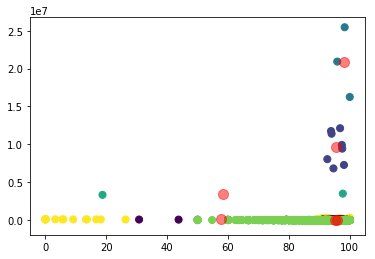

In [14]:
#显示聚类后的结果
#定义数据
k=6#分为6类
km=KMeans(n_clusters=k,init='random', max_iter=30)
km.fit(df_st)
#获取簇心
center=km.cluster_centers_
y_kmean= km.predict(df_st)
plt.scatter(df_st.iloc[:,0], df_st.iloc[:,1],c=y_kmean, s=50, cmap='viridis')
plt.scatter(center[:,0],center[:,1], c='red', s=100, alpha=0.5)


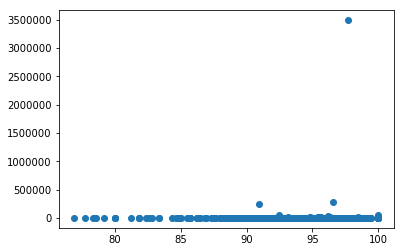

In [15]:
#对第一时间段做聚类分析
import numpy as np
df_one=df1[df1['日期'].isin([123,124,125,126,127])]
df_one=df_one.loc[:,'成功率':'响应时间']
x=df_one.copy()
df_one=df_one.sample(frac=0.8,random_state=30)#选取80%做训练
df_one_test=x[~((x.loc[:,'成功率':'响应时间'].isin(df_one.loc[:,'成功率':'响应时间'])))]
df_one_test=df_one_test.dropna()#20% 做测试
plt.scatter(df_one.iloc[:,0], df_one.iloc[:,1])


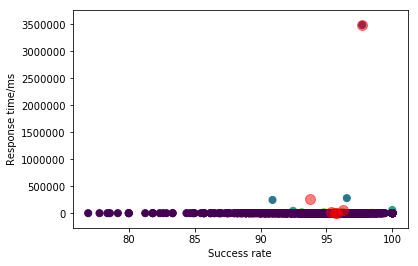

In [16]:
k=6#分为6类
km=KMeans(n_clusters=k,init='k-means++', max_iter=30)
km.fit(df_one)
#获取簇心
center=km.cluster_centers_
y_kmean_2= km.predict(df_one)
plt.scatter(df_one.iloc[:,0], df_one.iloc[:,1],c=y_kmean_2, s=50, cmap='viridis')
plt.scatter(center[:,0],center[:,1], c='red', s=100, alpha=0.5)
plt.xlabel('Success rate')
plt.ylabel('Response time/ms')
df_one['点分类']=y_kmean_2

从第一时间段的聚类我们可以得出， 在下方的紫色的点， 在稍微上方一点的黄色的点，和最上方的点分别为三类， 在最下方的点我们归为正常点，其成功率较高且响应时间极短，而黄色的点在训练集中并不明显我们将其也归为疑似异常点， 而最上方的点响应时间极度异常，我们将其列为异常点

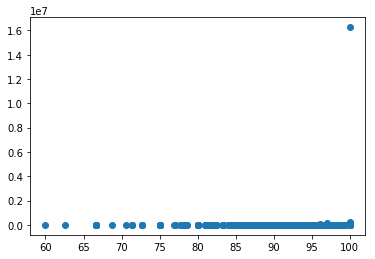

In [17]:
df_two=df1[df1['日期'].isin([128,129,130,131,201,202,203,204])]
df_two=df_two.loc[:,'成功率':'响应时间']
y=df_two.copy()
df_two=df_two.sample(frac=0.8,random_state=30)#选取80%做训练
df_two_test=y[~((y.loc[:,'成功率':'响应时间'].isin(df_two.loc[:,'成功率':'响应时间'])))]
df_two_test=df_two_test.dropna()#20% 做测试
plt.scatter(df_two.iloc[:,0], df_two.iloc[:,1])


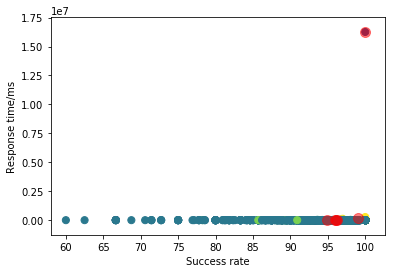

In [18]:
#对第二类情况
import matplotlib.pyplot as plt
k=6#分为6类
km=KMeans(n_clusters=k,init='random', max_iter=30,algorithm='full')
km.fit(df_two)
#获取簇心
center=km.cluster_centers_
y_kmean1= km.predict(df_two)
plt.scatter(df_two.iloc[:,0], df_two.iloc[:,1],c=y_kmean1, s=50, cmap='viridis')
plt.scatter(center[:,0],center[:,1], c='red', s=100, alpha=0.5)
plt.xlabel('Success rate')
plt.ylabel('Response time/ms')
df_two['点分类']=y_kmean1

In [19]:
y_kmean1

array([2, 2, 2, ..., 2, 2, 2])

我们通过第二段时间可以知道，由于第二段时间是平均交易量偏低，从成功率和响应时段来看，我们将其分为三大类，底端的点为正常点，其余的点全部归为疑似正常点，具体的判断条件通过决策树来处理

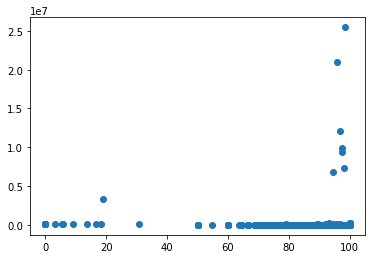

In [20]:
#第三类时间
df_three=df1[~(df1['日期'].isin([123,124,125,126,127,128,129,130,131,201,202,203,204]))]
df_three=df_three.loc[:,'成功率':'响应时间']
z=df_three.copy()
df_three=df_three.sample(frac=0.8,random_state=30)#选取80%做训练
df_three_test=z[~((z.loc[:,'成功率':'响应时间'].isin(df_three.loc[:,'成功率':'响应时间'])))]
df_three_test=df_three_test.dropna()#20% 做测试
plt.scatter(df_three.iloc[:,0], df_three.iloc[:,1])

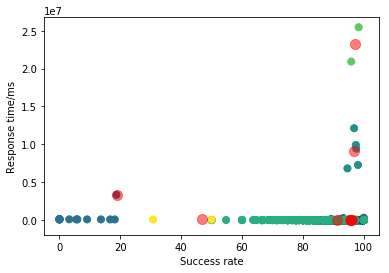

In [21]:
k=9#分为9类
km=KMeans(n_clusters=k,init='random', max_iter=30)
km.fit(df_three)
#获取簇心
center=km.cluster_centers_
y_kmean= km.predict(df_three)
plt.scatter(df_three.iloc[:,0], df_three.iloc[:,1],c=y_kmean, s=50, cmap='viridis')
plt.scatter(center[:,0],center[:,1], c='red', s=100, alpha=0.5)
plt.xlabel('Success rate')
plt.ylabel('Response time/ms')
df_three['点分类']=y_kmean
#df_three.loc[df_three['点分类'] !=0]

## 由于取数的随机，导致图片颜色可能会变化，反正就是在分的9个类中，responsetime越小且success rate越接近100， 其就是正常点。 熙宝你到时候自己看一下【doge】

第三个模型也可以看到，我们经过聚类分析后，绿色的点大部分为疑似异常点，紫色的点大部分为正常点，黄色的点为异常点。我们可以看出来，部分异常点放入其余两个时间段实际是正常点，所以我们将其分为了三类进行更好的对比和处理。

对每一个时间段，我们会单独通过决策树的对成功率和响应时间进行参数提取

In [22]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

In [23]:
x1_train=df_one.loc[:,'成功率':'响应时间' ]
y1_train=df_one.loc[:,'点分类']
clf=tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf=clf.fit(x1_train.values, y1_train.values)#train
#返回预测的准确度

prediction=clf.predict(df_one_test.values)
df_one_test['点分类预测']=prediction
df_one_test
x1_test=df_one_test.loc[:,'成功率':'响应时间' ]
y1_test=df_one_test.loc[:,'点分类预测']
score=clf.score(x1_test,y1_test)
score

1.0

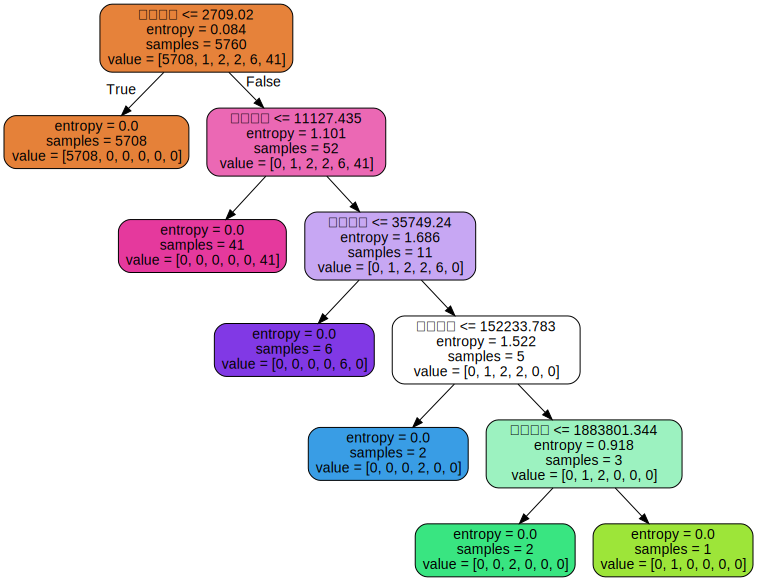

In [24]:
dot_data=tree.export_graphviz(
    #输入已经训练好的模型
    clf,
    #输入特征名字
    feature_names=['成功率','响应时间'] ,
    #标签名字
    #class_names=['琴酒','雪莉','贝尔摩德'],
    #填充颜色
    filled=True,
    #框改变形状
    rounded=True
)
graph=graphviz.Source(dot_data)
graph

从第一个决策树中我们可以看到，我们将其大类分为三类，小类分为六类，仅取最小范围内的为正常点，其余范围内的为疑似异常点和异常点，我们可以看到，在第一个时间段中，我们通过决策树得到的阈值为3094.085， 也就是说响应时间在3s内我们都认为是正常点，在10916.985以内的时间认为是疑似异常点，其余时间统一的认定为异常点

In [25]:
x2_train=df_two.loc[:,'成功率':'响应时间' ]
y2_train=df_two.loc[:,'点分类']
clf2=tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf2=clf2.fit(x2_train.values, y2_train.values)#train
#返回预测的准确度
df_two_test
prediction=clf.predict(df_two_test.values)
df_two_test['点分类预测']=prediction
df_two_test
df_two_test
x2_test=df_two_test.loc[:,'成功率':'响应时间' ]
y2_test=df_two_test.loc[:,'点分类预测']

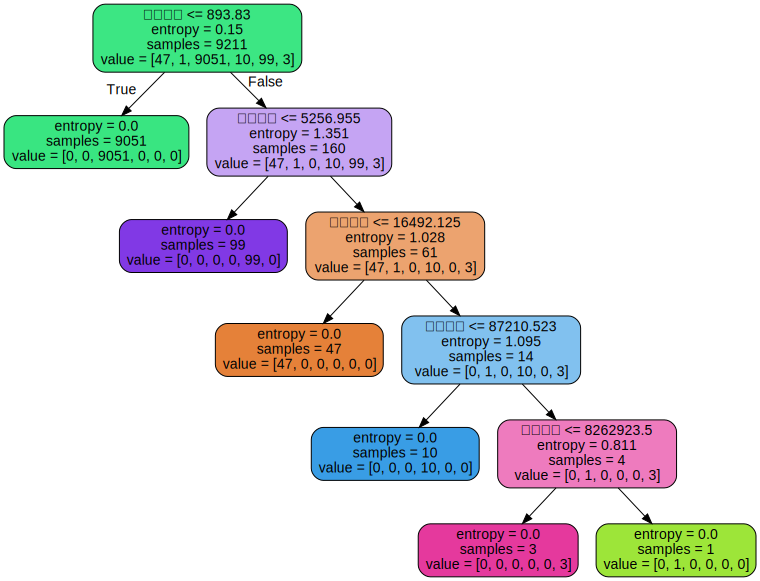

In [26]:
dot_data2=tree.export_graphviz(
    #输入已经训练好的模型
    clf2,
    #输入特征名字
    feature_names=['成功率','响应时间'] ,
    #标签名字
    #class_names=['琴酒','雪莉','贝尔摩德'],
    #填充颜色
    filled=True,
    #框改变形状
    rounded=True,
)
graph=graphviz.Source(dot_data2)
graph

第二段时间的情况明显必第一段时间情况好的多，其阈值为 2102.41， 如果小于该段时间，则说明其响应时间处于正常范围内，对于响应时间为2102.41到16492.125的情况，我们规定为疑似异常点，剩下的点为异常点

In [27]:
x3_train=df_three.loc[:,'成功率':'响应时间' ]
y3_train=df_three.loc[:,'点分类']
clf3=tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
clf3=clf3.fit(x3_train.values, y3_train.values)#train
#返回预测的准确度
df_three_test
prediction=clf.predict(df_three_test.values)
df_three_test['点分类预测']=prediction

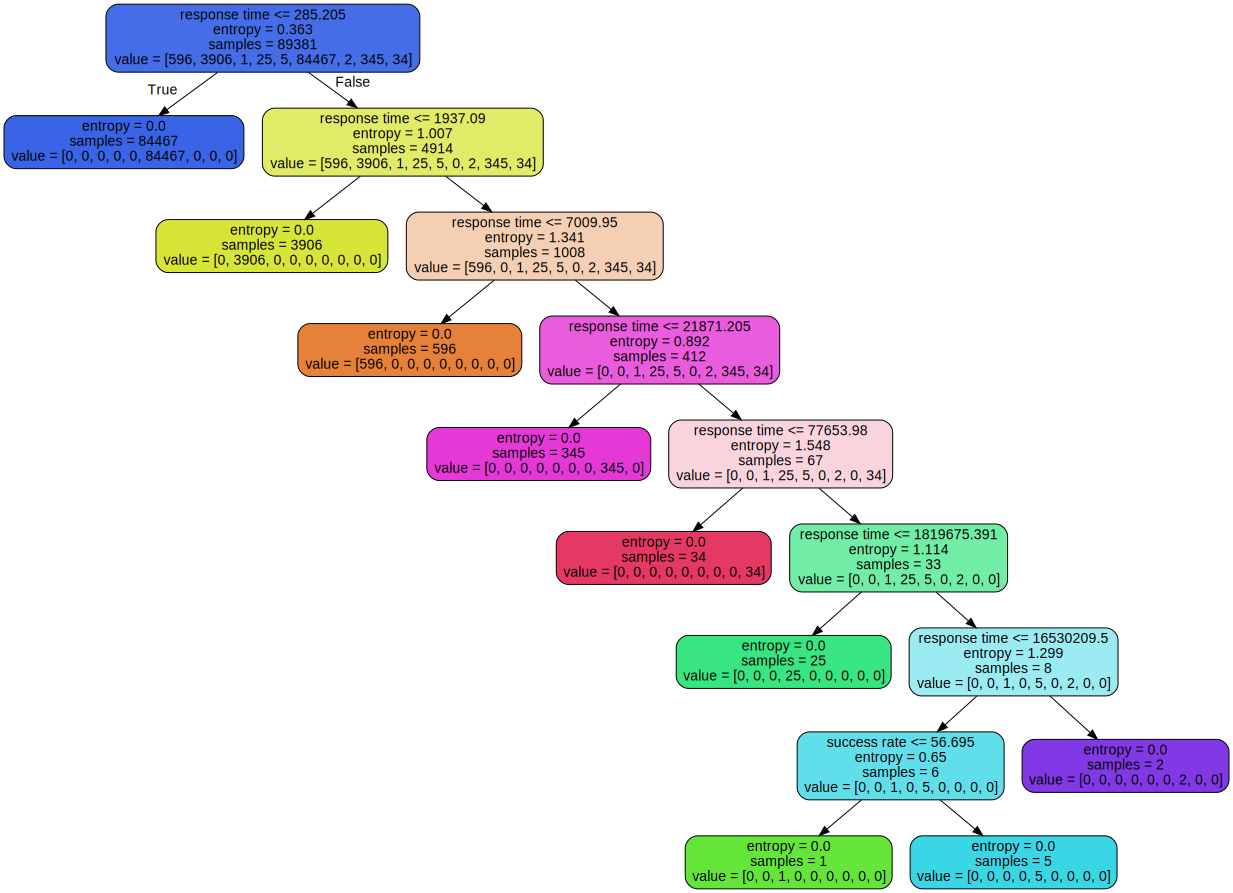

In [28]:

dot_data3=tree.export_graphviz(
        #输入已经训练好的模型
        clf3,
        #输入特征名字
        feature_names=['success rate','response time'] ,
        #标签名字
        #class_names=['琴酒','雪莉','贝尔摩德'],
        #填充颜色
        filled=True,
        #框改变形状
        rounded=True,
        
    )
graph=graphviz.Source(dot_data3)
graph

对第三类时间如上图，对于第三类我们对其着重进行了归类处理，我们为了提高精确度，将其分为了9个类，由图可得：在成功率不小于55.69的情况下，我们规定在阈值小于1889.765 的情况下为正常点，时间在1889.765到19168.44内的点为疑似异常点，其余的点为异常点。 如果成功率小于55.69，则直接归类为异常点

In [29]:
#第一段时间需要处理的点
need_fix1_train=df_one[~(df_one['点分类'].isin([0,5]))]
need_fix1_test=df_one_test[~(df_one_test['点分类预测'].isin([0,5]))]
need_fix1_test.rename(columns={'点分类预测':'点分类'},inplace=True)
need_fix1_test
need_fix1=pd.concat([need_fix1_test,need_fix1_train])
need_fix1
a=need_fix1.index

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [30]:
#第二段时间需要处理的点
need_fix2_train=df_two[~(df_two['点分类'].isin([0,3,4]))]
need_fix2_test=df_two_test[~(df_two_test['点分类预测'].isin([0,5]))]
need_fix2_test.rename(columns={'点分类预测':'点分类'},inplace=True)
need_fix2_test
need_fix2=pd.concat([need_fix2_test,need_fix2_train])
need_fix2
b=need_fix2.index
b

Int64Index([  1139,  33868,  39328,  39448,  39568,  50548,  55768, 104519,
            121019,  77655,
            ...
             12077,  23236,  66730,  72354,  55721, 115597,  12348,  99274,
             61286,  44702],
           dtype='int64', length=9064)

In [31]:
need_fix3_train=df_three[~(df_three['点分类'].isin([1,5,3,7]))]
need_fix3_train
need_fix3_test=df_three_test[~(df_three_test['点分类预测'].isin([0,5,3]))]

need_fix3_test.rename(columns={'点分类预测':'点分类'},inplace=True)
need_fix3_test
need_fix3=pd.concat([need_fix3_test,need_fix3_train])
need_fix3
c=need_fix3.index

In [32]:
a,b,c
need_fixed_index=a.tolist()+b.tolist()+c.tolist()

In [33]:
df_ned=df1.iloc[need_fixed_index,:]
df_ned.to_csv('需要修复的节点.csv',encoding='utf-8-sig')

最后对我们的模型进行一个总结，其中X表示判定， 0,1,2分别对应正常点，疑似异常点和异常点， T表示响应时间，S表示成功率，D表示时间段
    1. J=0,D为第一时间段，T<3094.085
    2. J=1,D为第一时间段, T<10916.985
    3. J=2,D为第一时间段, T>10916.985
    4. J=0,D为第二时间段, T<2102.41
    5. J=1,D为第二时间段, T<16492.125
    6. J=2,D为第二时间段, T>16492.125
    7. J=0,D为第三时间段, T<1889.765, S>55.69%
    8. J=1,D为第三时间段, T<19168.44, S>55.69%
    9. J=2,D为第三时间段, T>16492.125或 S<55.69%
    
我们先根据LOF算法来对交易量进行一个异常值处理，然后通过k-means聚类和决策树对成功率和响应时间做一个异常值的检测和聚类， 最后已两个模型做一个并集来最终确定我们的需要修复的异常点